In [147]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# Sets the DPI for higher image quality.
mpl.rcParams['figure.dpi']= 150

# Sets the grid to dark mode.
sns.set_style("darkgrid")

## Data Preparation

In [149]:
# Loads the dataset.
df = pd.read_csv("simple_data.csv")
df

,player_id,level,attempt,time_to_complete,deaths,shots_fired,shots_hit,heals_used,distance_travelled
0,P1,1,1,108,0,44,35,0,140.0
1,P7,1,1,82,2,64,24,1,170.0
2,P3,2,1,129,1,52,42,1,166.0
3,P9,1,1,76,1,60,23,0,165.0
4,P5,3,1,146,1,55,45,1,181.0
5,P2,1,1,74,1,58,22,0,160.0
6,P8,2,1,88,3,72,27,2,198.0
7,P4,4,1,151,2,63,51,2,195.0
8,P10,2,1,85,2,68,26,1,193.0
9,P6,2,1,124,0,47,38,0,158.0


In [150]:
# Groups by player ID and calculates the means for some features.
means = df.groupby("player_id")[["level", "deaths", "shots_fired", "shots_hit"]].mean().round(2)
means

,level,deaths,shots_fired,shots_hit
player_id,,,,
P1,2.67,1.00,53.67,43.50
P10,2.83,3.17,77.33,29.50
P2,2.83,2.67,73.50,27.67
P3,2.83,1.17,56.17,45.83
P4,3.17,1.17,56.50,46.33
P5,3.00,1.00,55.00,45.17
P6,3.00,0.80,53.20,43.80
P7,3.00,3.60,80.40,30.20
P8,2.83,3.33,76.33,28.50


## Plotting
Time to plot the data!

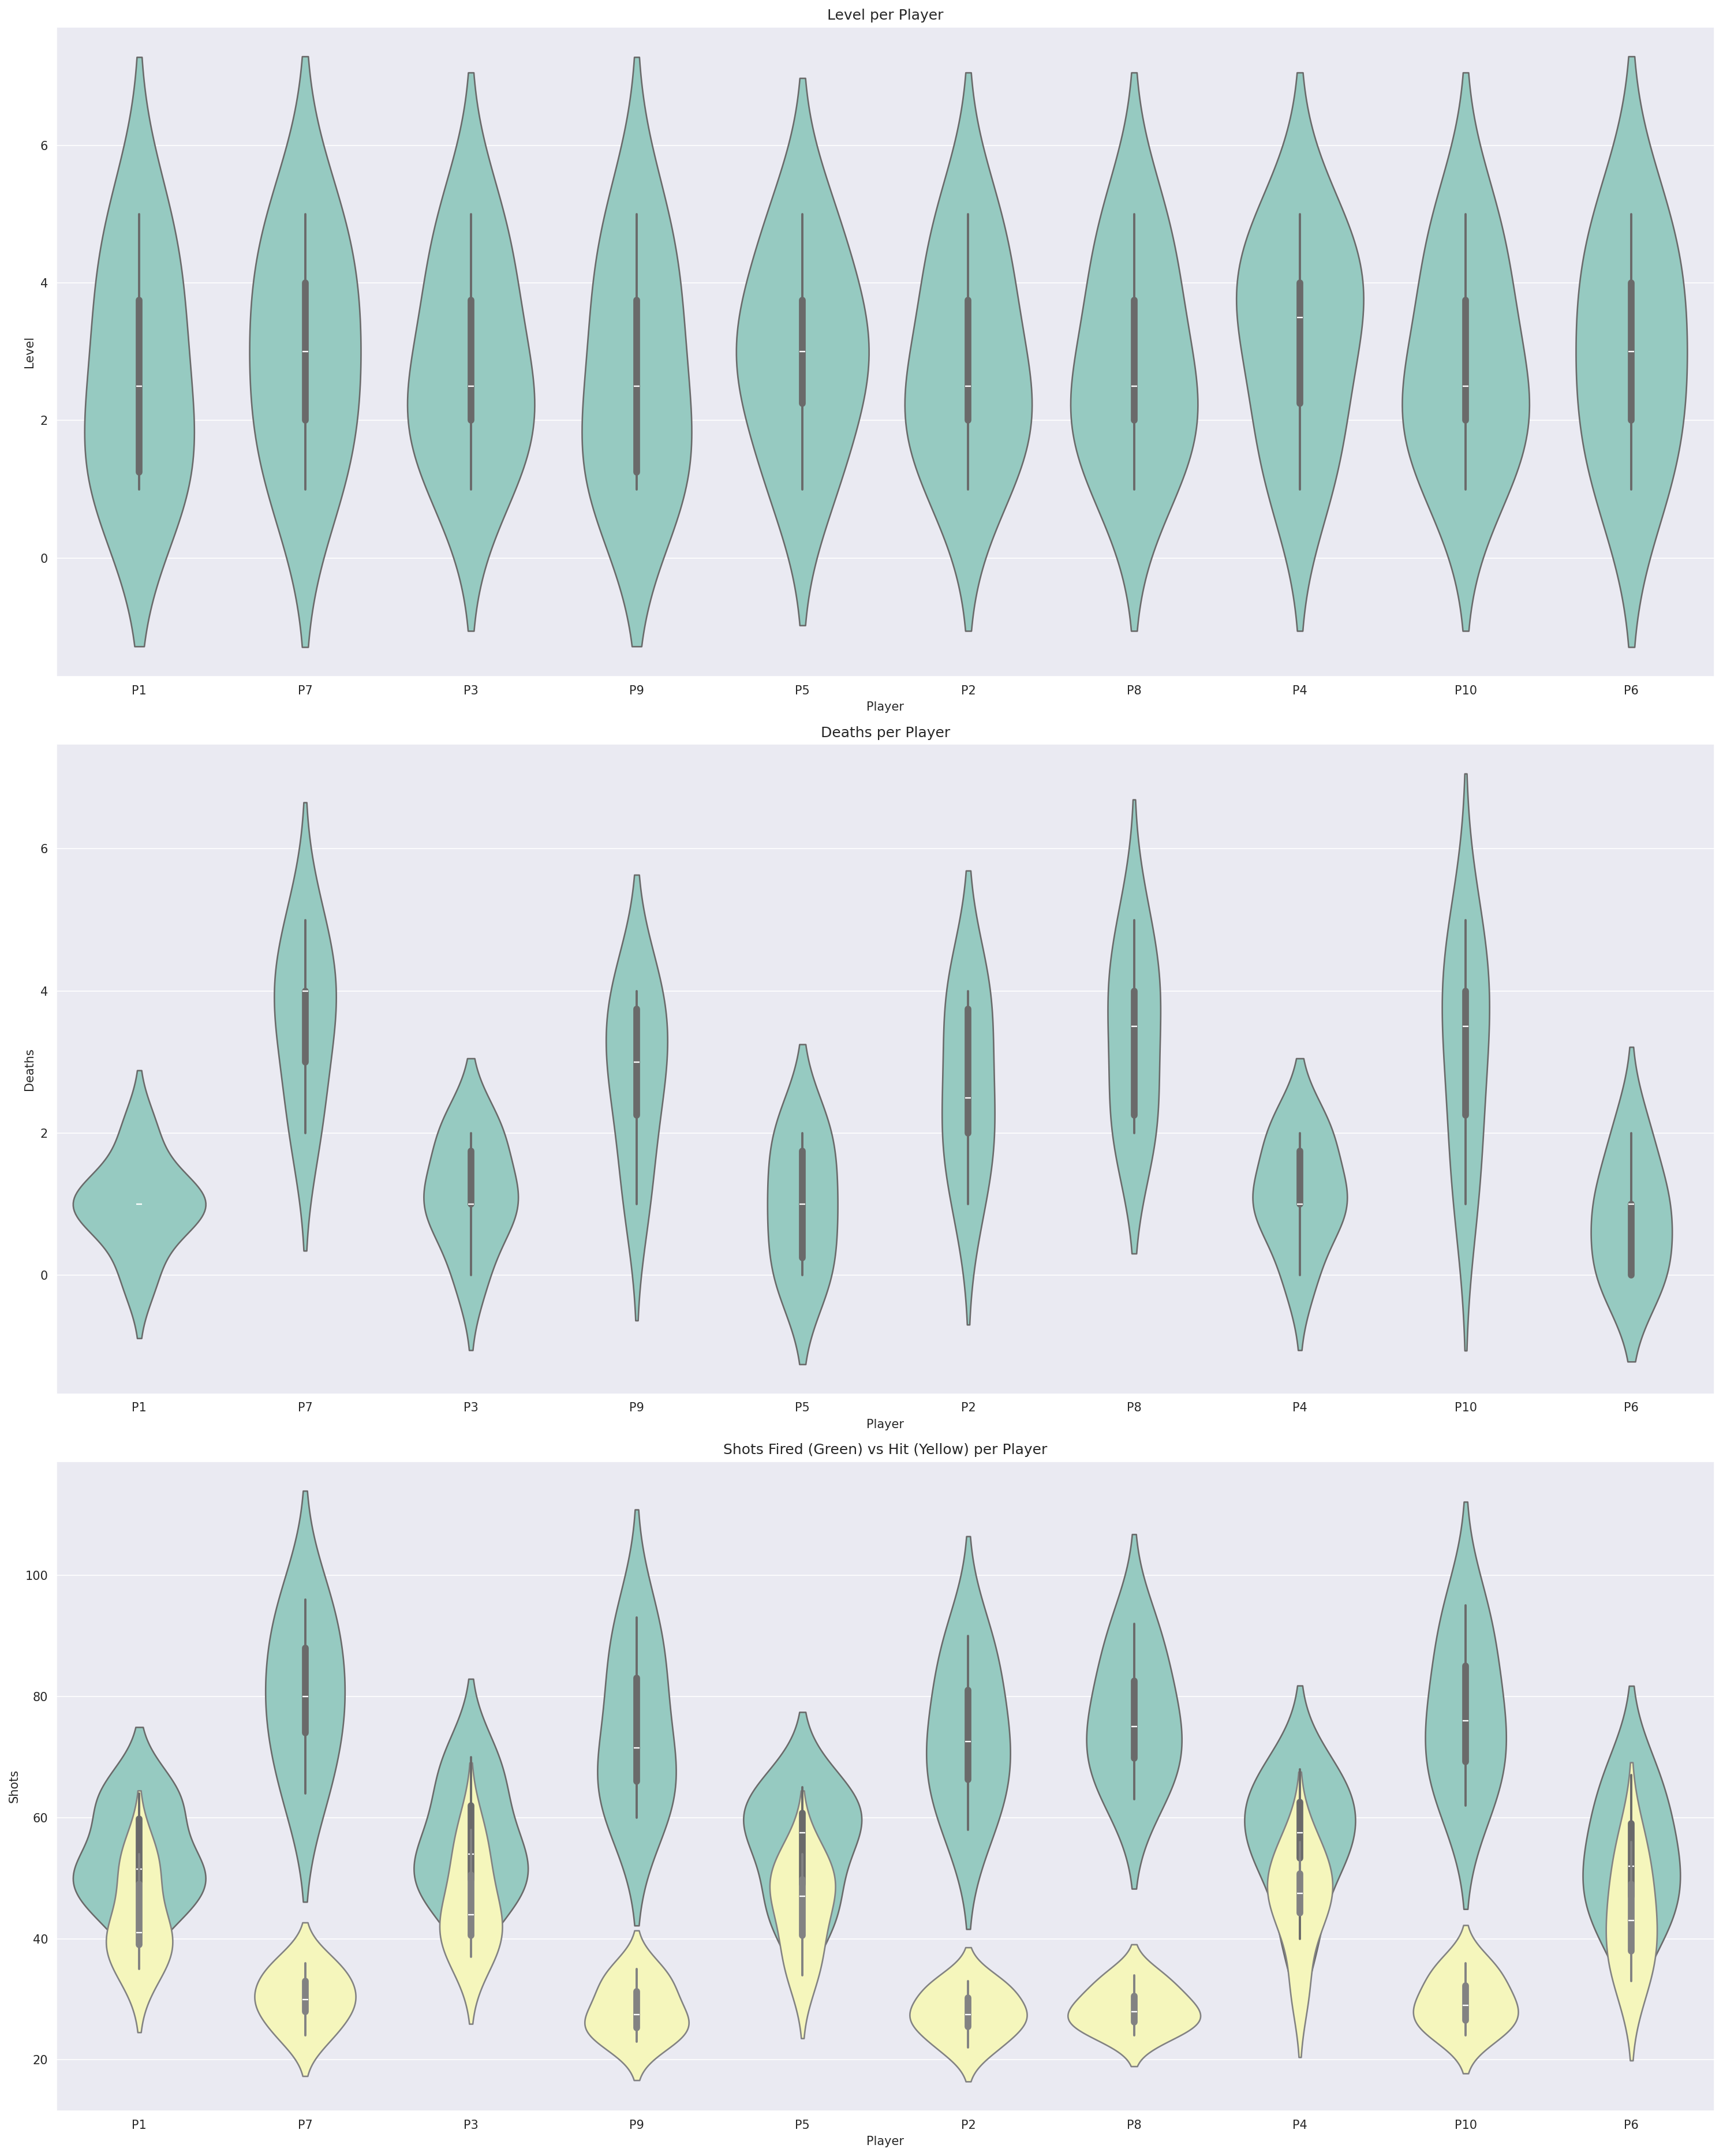

In [152]:
# Displays the box plots for each player.
fig, axs = plt.subplots(nrows=3, figsize=(20, 25))
sns.violinplot(x="player_id", y="level", data=df, ax=axs[0])
sns.violinplot(x="player_id", y="deaths", data=df, ax=axs[1])
sns.violinplot(x="player_id", y="shots_fired", data=df, ax=axs[2])
sns.violinplot(x="player_id", y="shots_hit", data=df, ax=axs[2])

# Formats a little.
axs[0].set_title("Level per Player")
axs[0].set_xlabel("Player")
axs[0].set_ylabel("Level")
axs[1].set_title("Deaths per Player")
axs[1].set_xlabel("Player")
axs[1].set_ylabel("Deaths")
axs[2].set_title("Shots Fired (Green) vs Hit (Yellow) per Player")
axs[2].set_xlabel("Player")
axs[2].set_ylabel("Shots")

fig.tight_layout()
plt.show()

## Findings

### Interpretation 1

Players which reach higher levels often have a lower death count.<br/>
Additionally, they shoot more purposefully: lower shots fired count, higher shots hit count, with a lower difference between them than players that only achieve lower levels.<br/>
This reveals that players who reach higher levels are often more experienced and may know the game mechanics better, avoiding deaths and knowing when to shoot.<br/>
Therefore, seems that the game is more based on skill than luck, which is a good thing for a game of this type.

### Interpretation 2

Relating to Interpretation 1, in general, players who shoot more often hit less often.<br/>
This could be because they're less purposeful with their aiming and shooting.<br/>
This creates two categories of players:
- Those who save their ammo and only shoot when necessary (lower shooting count, higher hit count);
- Those who shoot at everything that moves without considering whether they can get a clean shot in.